In [1]:
import numpy as np
np.random.seed(2022)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy.stats as stats

#### How do we know, which polynomial to use for the fit? 

At what point are we overfitting?

Over fitting means fitting the noise, rather than the signal. 

Test to get a good fitting degree is leave-one-out, or $\bf{cross-validation}$.


If we fit the noise, leaving one point from the set, will couse a precise fit for the other points, 
but the left out will add a lot to the means square error, MSE.

The MSE is a measure of the $\bf{goodness\ of\ the\ fit}$.

We also say that MSE is a $\bf{cost\ function}$.

0.010023197156564268

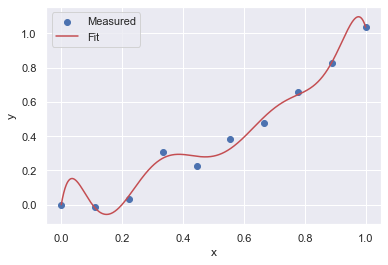

In [2]:
# Generate data from a 2nd order polynomial
x=np.linspace(0,1,10)
y=x**2+np.random.normal(scale=0.1,size=10)

plt.scatter(x,y,label="Measured")

y_fit=np.polynomial.polynomial.Polynomial.fit(x,y,deg=8)

x_fit=np.linspace(0,1,1000)
plt.plot(x_fit,y_fit(x_fit),color='r',label='Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
#Cost function:

CF=np.sum((y-y_fit(x))**2)
CF

5.884054221549489e-29

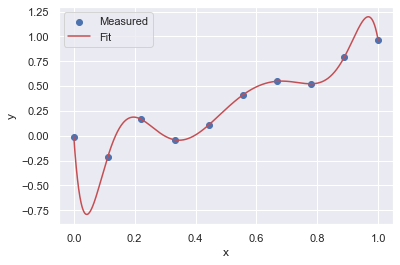

In [3]:
# Degree 9 gives perfect fit
x=np.linspace(0,1,10)
y=x**2+np.random.normal(scale=0.1,size=10)

plt.scatter(x,y,label='Measured')

y_fit=np.polynomial.polynomial.Polynomial.fit(x,y,deg=9)

x_fit=np.linspace(0,1,1000)
plt.plot(x_fit,y_fit(x_fit),color='r',label='Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
#Cost function:

CF=np.sum((y-y_fit(x))**2)
CF

C:\Users\ilija\anaconda3\lib\site-packages\numpy\polynomial\polynomial.py:1361: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


0.06528769399431876

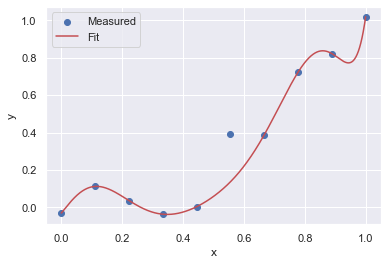

In [4]:
#Let's leave one out, and see how i does for the left point 
# The real fit should be of order 2
x=np.linspace(0,1,10)
y=x**2+np.random.normal(scale=0.1,size=10)

plt.scatter(x,y,label='Measured')

new_y=np.delete(y,5)
new_x=np.delete(x,5)

y_fit=np.polynomial.polynomial.Polynomial.fit(new_x,new_y,deg=9)

x_fit=np.linspace(0,1,1000)
plt.plot(x_fit,y_fit(x_fit),color='r',label='Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
#Cost function:

CF=np.sum((y-y_fit(x))**2)
CF


#### The cross-validation algorithm

The measure of goodness of the fit, the $\bf{cost\ function}$ is the MSE, mean square error.

MSE is the sum of the squares of the differences between the measures y-values, 
and the ones obtained from the fit.


$MSE=\frac{1}{n}\sum_{i=1}^n(y_i-y_{fit}(x_i))^2$

Here I will use:

$CF=\sum_{i=1}^n(y_i-y_{fit}(x_i))^2$

The algorithm is as folllows:

    1. Set a value for n.

    2. Take out one of the points, and perform a fit to a plynomial with degree n.
    
    3. Add the MSE to the CF (either total, or only from the left point).
    
    4. Repeat for all points with fit n. Record the total CF(n).
    
    5. Repeat for many values of n.
    
    6. Plot n vs. CF(n).
    
    7. Decide the best n is for min(CF(n)).

0.0001465592060778596

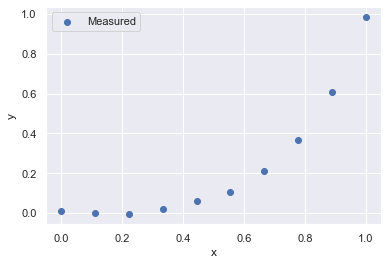

In [8]:
# Generate data from a 4th order polynomial
x=np.linspace(0,1,10)
y=x**4+np.random.normal(scale=0.01,size=10)

plt.scatter(x,y,label='Measured')

y_fit=np.polynomial.polynomial.Polynomial.fit(x,y,deg=6)

#plt.plot(x,y_fit(x),color='r',label='Fit')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
#Cost function:

CF=np.sum((y-y_fit(x))**2)
CF

Text(0, 0.5, 'CF')

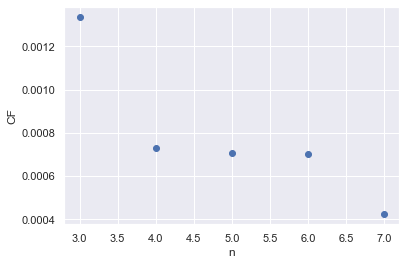

In [6]:
# Plot CF for several values of n, polynomial degree.
# We see that CF decreases with higher n.
# What n should we choose? As large as possible?

CF=np.zeros(7)
for n in np.arange(1,8):
    y_fit=np.polynomial.polynomial.Polynomial.fit(x,y,deg=n)
    CF[n-1]=np.sum((y-y_fit(x))**2)

plt.scatter(np.arange(3,8),CF[2:])
plt.xlabel('n')
plt.ylabel('CF')

Text(0, 0.5, 'CF')

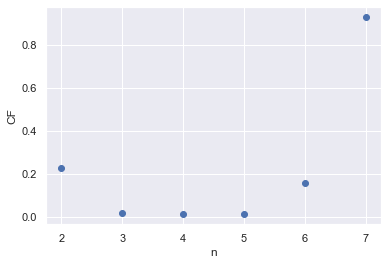

In [7]:
#Let's do a leave one out fittings for several values of n.
#We get a minimim of CF for some n.

CF=np.zeros(7)
for n in np.arange(1,8):
    CF[n-1]=0.0
    for i in np.arange(0,10):
        new_y=np.delete(y,i)
        new_x=np.delete(x,i)
        y_fit=np.polynomial.polynomial.Polynomial.fit(new_x,new_y,deg=n)
        CF[n-1]+=np.sum((y-y_fit(x))**2)

plt.scatter(np.arange(2,8),CF[1:])
plt.xlabel('n')
plt.ylabel('CF')

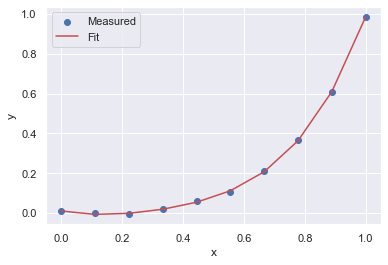

In [11]:
#Finally, fit your data for that n.
#That's the best fit, wihtout overfitting.

plt.scatter(x,y,label='Measured')

y_fit=np.polynomial.polynomial.Polynomial.fit(x,y,deg=4)

plt.plot(x,y_fit(x),color='r',label='Fit')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()